### Imports & Options

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt

In [3]:
from src.directories import DATA_DIR
from src import rides, graph, utils

### Data

In [31]:
# chicago = graph.download_biking_network()
df = rides.load_data()

### Bicycle Trips

In [5]:
# ox.plot_graph(chicago, node_size=0)

#### Quick Summary of Rides Table

In [6]:
first = df["started_at"].min().strftime("%A, %B %-d")
last = df["ended_at"].max().strftime("%A, %B %-d")
f"{df.shape[0]:,} trips between {first}, and {last}."

'761,376 trips between Saturday, July 1, and Tuesday, August 1.'

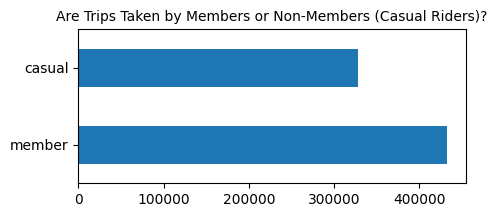

In [7]:
fig, ax = plt.subplots(figsize=(5,2))
df["member_casual"].value_counts().plot.barh(ax=ax)
ax.set_title("Are Trips Taken by Members or Non-Members (Casual Riders)?", fontsize=10)
ax.set_ylabel("");

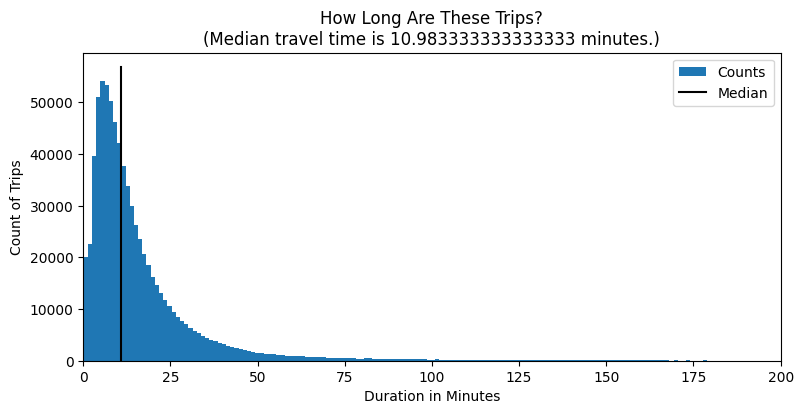

In [8]:
fig, ax = plt.subplots(figsize=(9,4))
ax = df["duration"].apply(lambda td: td.seconds / 60).plot.hist(ax=ax, bins=400, label="Counts")

_median = df["duration"].apply(lambda td: td.seconds / 60).median()
_median = round(_median, 1)
ax.plot([_median, _median], [0, ax.get_ylim()[1]], color="k", label="Median")

ax.set_title(f"How Long Are These Trips?\n(Median travel time is {_median} minutes.)")
ax.set_ylabel("Count of Trips")
ax.set_xlabel("Duration in Minutes")
ax.set_xlim([0,200])
ax.legend()

In [9]:
crow_flies = lambda row: utils.as_the_crow_flies_distance(row.start_lat, row.start_lng, row.end_lat, row.end_lng)
df["distance"] = df.apply(crow_flies, axis=1)

Text(0, 0.5, 'Count of Trips')

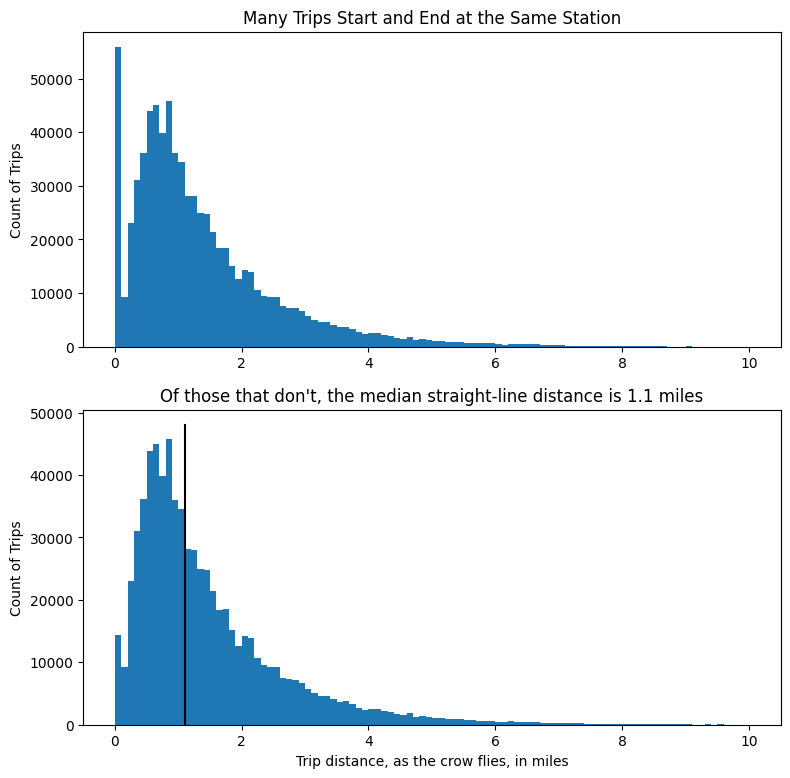

In [10]:
fig, ax = plt.subplots(nrows=2, figsize=(9,9))

chart_df = df[df["distance"] <= 10]

bin_width = 0.1
data = chart_df["distance"].values
bins = np.arange(min(data), max(data) + bin_width, bin_width)
chart_df["distance"].plot.hist(ax=ax[0], bins=bins)
ax[0].set_title("Many Trips Start and End at the Same Station")
ax[0].set_ylabel("Count of Trips")

chart_df = chart_df[chart_df["distance"] > 0]
chart_df["distance"].plot.hist(ax=ax[1], bins=bins)
_median = df[df["distance"] > 0]["distance"].median()
ax[1].plot([_median, _median], [0, ax[1].get_ylim()[1]], color="k")
_median = round(_median, 1)
ax[1].set_title(f"Of those that don't, the median straight-line distance is {_median} miles")
ax[1].set_xlabel("Trip distance, as the crow flies, in miles")
ax[1].set_ylabel("Count of Trips")

##### How long are the trips that start and end at the same location?

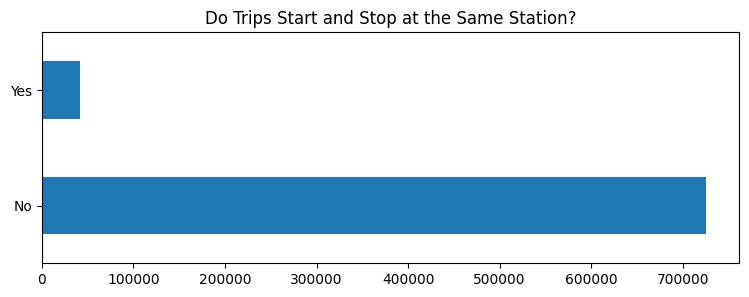

In [28]:
fig, ax = plt.subplots(figsize=(9,3))
df["same_start_and_end"].apply(lambda bl: "Yes" if bl else "No").value_counts().plot.barh(ax=ax)
ax.set_title("Do Trips Start and Stop at the Same Station?")
ax.set_ylabel("");

/var/folders/g3/_j74n30j6pj1dqfbk8qkcfb40000gp/T/ipykernel_53408/295021471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_trips["duration_seconds"] = round_trips["duration"].apply(lambda td: td.days*24*60*60 + td.seconds)


<Axes: ylabel='Frequency'>

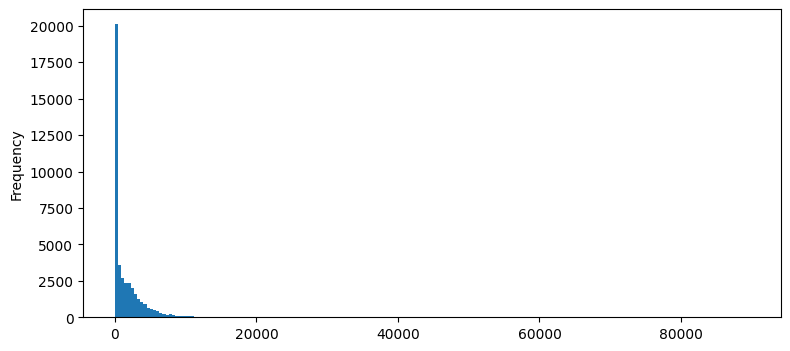

In [40]:
fig, ax = plt.subplots(figsize=(9,4))
round_trips = df[df["same_start_and_end"]]
round_trips["duration_seconds"] = round_trips["duration"].apply(lambda td: td.days*24*60*60 + td.seconds)
round_trips["duration_seconds"].plot.hist(ax=ax, bins=200)

In [44]:
(round_trips["duration_seconds"] <= 30).value_counts()

duration_seconds
False    35417
True      6761
Name: count, dtype: int64

In [34]:
round_trips.sort_values("duration", ascending=False)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,same_start_and_end,duration
257843,6EA5C4A03EE52C44,classic_bike,2023-07-17 18:57:07,2023-07-18 19:50:27,Ellis Ave & 60th St,KA1503000014,Ellis Ave & 60th St,KA1503000014,41.785097,-87.601073,41.785097,-87.601073,casual,True,1 days 00:53:20
205845,9C9DBBD2DC872B6A,classic_bike,2023-07-22 09:19:03,2023-07-23 10:11:43,Cornell Ave & Hyde Park Blvd,KA1503000007,Cornell Ave & Hyde Park Blvd,KA1503000007,41.802406,-87.586924,41.802406,-87.586924,casual,True,1 days 00:52:40
186126,A9521ACAE3830A3E,classic_bike,2023-07-27 16:45:18,2023-07-28 17:37:34,Clark St & Jarvis Ave,517,Clark St & Jarvis Ave,517,42.015963,-87.675005,42.015963,-87.675005,casual,True,1 days 00:52:16
420180,5F4722003E448156,classic_bike,2023-07-03 18:15:59,2023-07-04 18:47:30,Damen Ave & Cullerton St,13089,Damen Ave & Cullerton St,13089,41.854967,-87.675700,41.854967,-87.675700,member,True,1 days 00:31:31
44882,2BDFB5F7FC92EF4F,docked_bike,2023-07-15 17:23:18,2023-07-16 17:31:06,Warren Park East,RP-002,Warren Park East,RP-002,42.004550,-87.680666,42.004550,-87.680666,casual,True,1 days 00:07:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431788,A52545C64BAA29E1,electric_bike,2023-07-04 17:08:37,2023-07-04 17:08:37,Public Rack - Western Blvd & 49th St,821,Public Rack - Western Blvd & 49th St,821,41.804653,-87.683931,41.804780,-87.683749,casual,True,0 days 00:00:00
292295,E19EB96CF103F7CD,classic_bike,2023-07-15 15:01:58,2023-07-15 15:01:58,Lake Park Ave & 56th St,TA1309000063,Lake Park Ave & 56th St,TA1309000063,41.793242,-87.587782,41.793242,-87.587782,member,True,0 days 00:00:00
354273,CE965D382AED6196,electric_bike,2023-07-20 12:54:28,2023-07-20 12:54:27,California Ave & Marquette Rd,390,California Ave & Marquette Rd,390,41.771597,-87.693339,41.771579,-87.693357,casual,True,-1 days +23:59:59
724028,68912B520CB9541C,electric_bike,2023-07-20 11:04:45,2023-07-20 11:04:44,Public Rack - Milwaukee Ave & Higgins Ave,1121.0,Public Rack - Milwaukee Ave & Higgins Ave,1121.0,41.968576,-87.761332,41.968596,-87.761209,member,True,-1 days +23:59:59


In [14]:
df#[df["start_station_id"] == df["end_station_name"]]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,distance
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0 days 00:16:30,2.475151
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0 days 00:13:30,2.021301
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0 days 00:09:36,0.886014
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0 days 00:04:56,0.815781
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0 days 00:11:26,1.510812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767644,F874F0AB1BAE5A2A,electric_bike,2023-07-15 15:01:11,2023-07-15 15:09:41,NaN,NaN,NaN,NaN,41.850000,-87.660000,41.850000,-87.680000,member,0 days 00:08:30,1.029344
767645,57F5743A5828DA62,electric_bike,2023-07-14 19:17:13,2023-07-14 19:26:31,NaN,NaN,California Ave & Division St,13256,41.910000,-87.680000,41.903029,-87.697474,member,0 days 00:09:18,1.019493
767647,2661FBD1F5A1C76D,electric_bike,2023-07-15 13:34:00,2023-07-15 13:43:13,NaN,NaN,NaN,NaN,41.940000,-87.650000,41.930000,-87.640000,member,0 days 00:09:13,0.861145
767648,9CF4B70C23E033B1,electric_bike,2023-07-06 20:52:09,2023-07-06 21:01:13,NaN,NaN,NaN,NaN,41.910000,-87.630000,41.930000,-87.640000,member,0 days 00:09:04,1.474402
